In [121]:
import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook_connected" #To get VSCode to render Plotly Visuals in an ipynb


# import required modules
import zipfile

 
# read the dataset using the compression zip
df = pd.read_csv('https://cdn-charts.streeteasy.com/rentals/All/medianAskingRent_All.zip',compression='zip')

#The below renames df to data, and is done b/c we're removing #NA results
data = df.dropna()
data.isnull().sum()

data.head(5)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,4300.0,4350.0,4388.0,4500.0,4595.0,4595.0,4700.0,4800.0,4795.0,4850.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,3950.0,4095.0,4151.0,4345.0,4350.0,4350.0,4425.0,4467.0,4410.0,4500.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2925.0,3200.0,3300.0,3400.0,3500.0,3400.0,3400.0,3500.0,3500.0,3550.0
3,All Upper Manhattan,Manhattan,submarket,1836.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2300.0,2300.0,2350.0,2399.0,2400.0,2422.0,2500.0,2550.0,2700.0,2800.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,3600.0,3766.0,3909.0,3995.0,4000.0,4032.0,4238.0,4250.0,4244.0,4500.0


In [122]:

df = data.melt(id_vars=['areaName','Borough','areaType'], var_name='Attribute', value_name='Value')
df

,areaName,Borough,areaType,Attribute,Value
0,All Downtown,Manhattan,submarket,2010-01,3200.0
1,All Midtown,Manhattan,submarket,2010-01,2875.0
2,All Upper East Side,Manhattan,submarket,2010-01,2450.0
3,All Upper Manhattan,Manhattan,submarket,2010-01,1836.0
4,All Upper West Side,Manhattan,submarket,2010-01,2895.0
...,...,...,...,...,...
10414,Upper West Side,Manhattan,neighborhood,2022-07,4500.0
10415,Washington Heights,Manhattan,neighborhood,2022-07,2500.0
10416,West Village,Manhattan,neighborhood,2022-07,5173.0
10417,Williamsburg,Brooklyn,neighborhood,2022-07,4495.0


In [123]:
d2021 = df.query('Value >= 1000 & Attribute > "2020-12-01"')

dTotal = df.query('Borough == "Manhattan" & Attribute > "2015-01-01"')

#This cell is for filtering data. If you need to filter data, use this cell to set criteria, then rename the below to 'data1' instead of 'data'. If you don't want to filter anything, use just the 'data' dataframe. 



In [124]:
#play around with the axis' to see different datas. 
figure = px.histogram(d2021, x = "Value", color = "Borough", title = "FY2021 NYC Rent Distribution").update_yaxes(categoryorder="total ascending")

figure.show()

In [125]:
#play around with the axis' to see different data. 

dMonth = df.query('Value >= 1000 & Borough == "Manhattan" & Attribute > "2021-12-01"')
figure = px.histogram(dMonth, x = "Value", color = "areaName", title = "NYC Rents by Neighborhood, displayed by Price").update_yaxes(categoryorder="total ascending")

figure.show()

In [141]:
data3 = df.query('Value >= 1000 & Borough == "Manhattan" & Attribute > "2022-01-01"')

fig22 = px.density_heatmap(data3, x="Value", y="areaName",width=800, height=900).update_yaxes(categoryorder="total descending")

fig22.update_layout(
    title='Rent Heatmap since 2022', xaxis_nticks=35)

fig22.show()

In [127]:

d2022 = df.query('Value >= 2000 & Value < 6000 & Borough == "Manhattan" & Attribute > "2020-12-01" & areaName != "Inwood" & areaName != "Morningside Heights" & areaName != "All Upper Manhattan" & areaName != "Washington Heights"& areaName != "Roosevelt Island"& areaName != "East Harlem" & areaName != "Hamilton Heights"& areaName != "Central Harlem"')

fig = px.line(d2022, x="Attribute", y="Value", color='areaName', symbol='areaName', line_shape='spline' ,title='Selected Borough Neighborhoods, Price since 2021',width=1080, height=720)
fig.show()

In [128]:
dfUES = df.query('Borough == "Manhattan" & areaName == "Upper East Side"')

figUES = px.line(dfUES, x="Attribute", y="Value", color='areaName', symbol='areaName', line_shape='spline' ,title='Upper East Side Median Rent Price since 2010',width=1080, height=720)
figUES.show()

In [129]:
dfUES.describe()

,Value
count,151.000000
mean,2852.172185
std,243.117468
min,2400.000000
25%,2700.000000
50%,2850.000000
75%,2995.000000
max,3550.000000


In [130]:
##The Next Steps are to use Facebook NeuralProphet, a machine learning package, to try to predict rent prices over the next 24 months.##

# Select only the important features i.e. the date and price
dfUESnp = dfUES[["Attribute","Value"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting. ds is the date column, and y are the values.
dfUESnp = dfUESnp.rename(columns = {"Attribute":"ds","Value":"y"}) #renaming the columns of the dataset
dfUESnp.head(5)

,ds,y
63,2010-01,2450.0
132,2010-02,2450.0
201,2010-03,2400.0
270,2010-04,2500.0
339,2010-05,2550.0


In [131]:
#Reseting the index in the dataframe to import it into NeuralProphet

dfUESnp.reset_index(drop=True, inplace=True)

dfUESnp

,ds,y
0,2010-01,2450.0
1,2010-02,2450.0
2,2010-03,2400.0
3,2010-04,2500.0
4,2010-05,2550.0
...,...,...
146,2022-03,3400.0
147,2022-04,3400.0
148,2022-05,3500.0
149,2022-06,3500.0


In [132]:
from neuralprophet import NeuralProphet

m = NeuralProphet(yearly_seasonality=3,)
metrics = m.fit(dfUESnp)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.728% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 423
100%|██████████| 109/109 [00:00<00:00, 692.38it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.61E-01, min: 3.83E-01
100%|██████████| 109/109 [00:00<00:00, 688.07it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.21E+00, min: 1.47E+00
INFO - (NP

In [133]:
future = m.make_future_dataframe(df=dfUESnp, periods=24)
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.728% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


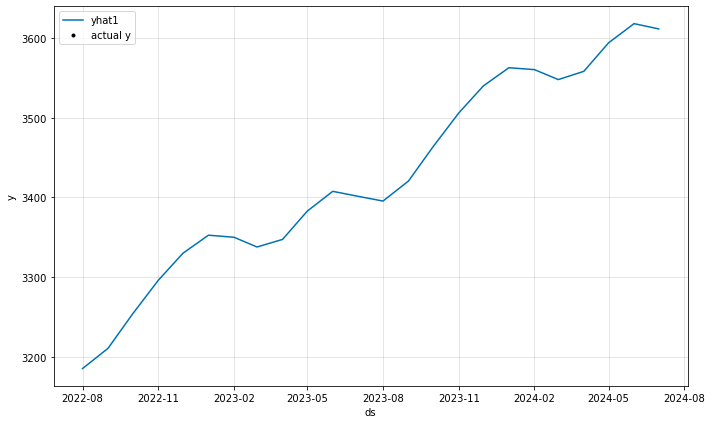

In [134]:
plot1 = m.plot(forecast)

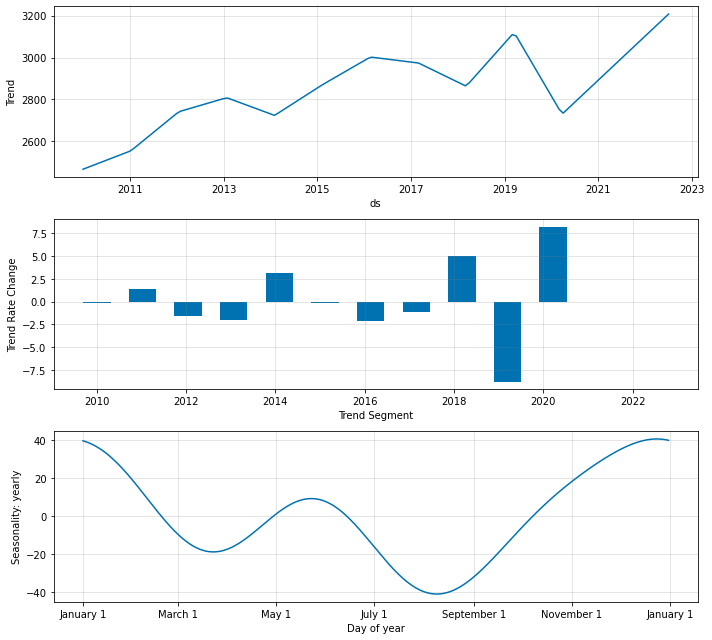

In [135]:
fig_param = m.plot_parameters()


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.728% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 423
Epoch[423/423]: 100%|██████████| 423/423 [00:07<00:00, 60.33it/s, SmoothL1Loss=0.0189, MAE=110, RMSE=170, RegLoss=0]   
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.728% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.071% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.

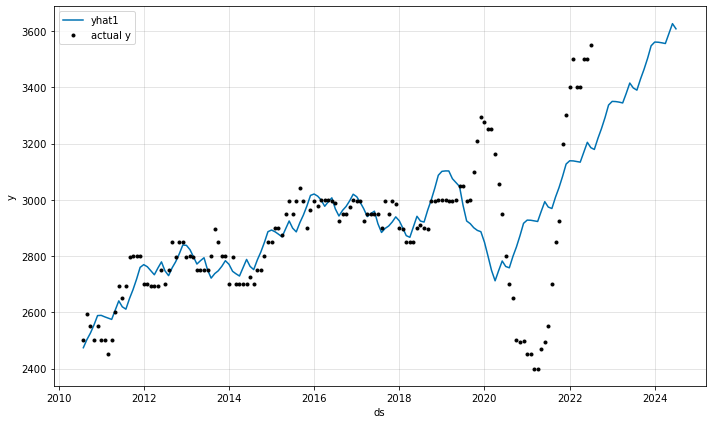

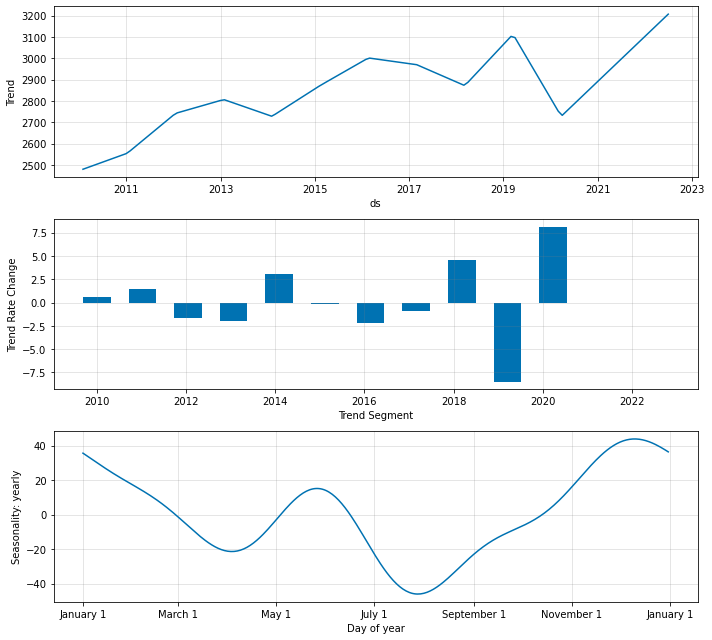

In [137]:
m = NeuralProphet(seasonality_mode= "additive", learning_rate = 0.1, yearly_seasonality=4, daily_seasonality=False, weekly_seasonality=False)
metrics_train2 = m.fit(df=dfUESnp, freq="M")
future = m.make_future_dataframe(dfUESnp, periods=24, n_historic_predictions=144)
forecast = m.predict(future)
fig = m.plot(forecast)
fig_param = m.plot_parameters()
